## Deep Learning with Tensorflow 2.0 Tutorial - Getting Started with Tensorflow 2.0 and Keras for Beginners

### What is Tensorflow?

Tensorflow architecture works in three parts:

- Preprocessing the data
- Build the model
- Train and estimate the model

I am assuming that you know a little about the machine learning and deep learning

### Why Every Data Scientist Learn Tensorflow 2.x not Tensorflow 1.x

- API Cleanup
- Eager execution
- No more globals
- Functions, not sessions (session.run())
- Use Keras layers and models to manage variables
- It is faster
- It takes less space
- More consistent
- and many more, watch Google I/O https://www.youtube.com/watch?v=lEljKc9ZtU8
- Github Link: https://github.com/tensorflow/tensorflow/releases

 ##### !pip install tensorflow==2.0.0-rc0 
 ##### !pip install tensorflow-gpu==2.0.0-rc0

## Import the Fashion MNIST dataset

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

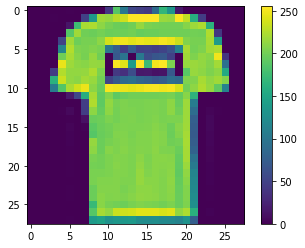

In [14]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
X_train = X_train/255.0

In [17]:
X_test = X_test/255.0

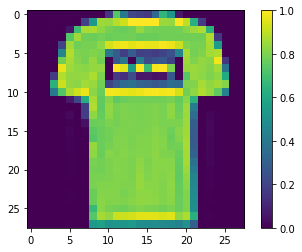

In [18]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

### Build the model with TF 2.0 

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [44]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
- Loss Function
- Optimizer
- Metrics

In [46]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 167us/sample - loss: 0.4954 - accuracy: 0.8236 - val_loss: 0.4053 - val_accuracy: 0.8537
Epoch 2/10
48000/48000 [==============================] - 8s 159us/sample - loss: 0.3723 - accuracy: 0.8627 - val_loss: 0.3663 - val_accuracy: 0.8688
Epoch 3/10
48000/48000 [==============================] - 8s 159us/sample - loss: 0.3371 - accuracy: 0.8745 - val_loss: 0.3524 - val_accuracy: 0.8752
Epoch 4/10
48000/48000 [==============================] - 7s 152us/sample - loss: 0.3108 - accuracy: 0.8857 - val_loss: 0.3472 - val_accuracy: 0.8733
Epoch 5/10
48000/48000 [==============================] - 7s 151us/sample - loss: 0.2952 - accuracy: 0.8900 - val_loss: 0.3415 - val_accuracy: 0.8784
Epoch 6/10
48000/48000 [==============================] - 7s 154us/sample - loss: 0.2850 - accuracy: 0.8941 - val_loss: 0.3395 - val_accuracy: 0.8823
Epoch 7/10
48000/48000 [==========================

In [25]:
from sklearn.metrics import accuracy_score

In [52]:
y_pred = model.predict_classes(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.8771

In [54]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [29]:
pred = model.predict(X_test)

In [30]:
pred

array([[1.0378109e-07, 3.4344114e-10, 3.2657663e-08, ..., 3.2207742e-02,
        5.6623634e-07, 9.6594465e-01],
       [2.4325291e-05, 1.2226226e-15, 9.9963951e-01, ..., 3.4266608e-19,
        1.7081907e-11, 1.7442809e-20],
       [9.2145235e-08, 9.9999988e-01, 1.7854611e-09, ..., 2.5951530e-19,
        3.9099119e-13, 2.3952825e-14],
       ...,
       [1.1445727e-05, 5.2679510e-11, 2.1690075e-05, ..., 8.0893742e-10,
        9.9980479e-01, 1.1307172e-14],
       [1.7775496e-06, 9.9996531e-01, 1.6312046e-07, ..., 6.9894035e-14,
        2.7232594e-10, 4.8510436e-09],
       [1.6369711e-05, 1.5035441e-10, 1.1912587e-06, ..., 1.4610433e-03,
        1.0641436e-05, 2.3296634e-06]], dtype=float32)

In [31]:
pred[0]

array([1.0378109e-07, 3.4344114e-10, 3.2657663e-08, 2.9451070e-11,
       1.1266184e-08, 1.8465755e-03, 2.9342914e-07, 3.2207742e-02,
       5.6623634e-07, 9.6594465e-01], dtype=float32)

In [32]:
np.argmax(pred[0])

9

In [33]:
np.argmax(pred[1])

2

## Plotting Learning Curve and Confusion Matrix in TensorFlow 2.0

##### Watch this video: https://youtu.be/SToqP9V9y7Q 

pip install mlxtend  ->  http://rasbt.github.io/mlxtend/installation/

In [34]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [49]:
history.history

{'loss': [0.4953796542973335,
  0.3722544004826341,
  0.33709590762215763,
  0.31081989756717426,
  0.2952256740569707,
  0.2850459320913675,
  0.27262215981689225,
  0.2617505266790704,
  0.2529912632145912,
  0.24233637595361188],
 'accuracy': [0.82360417,
  0.8626875,
  0.8744792,
  0.88575,
  0.89,
  0.8940833,
  0.89858335,
  0.90225,
  0.90502083,
  0.9085625],
 'val_loss': [0.4053303454086805,
  0.3662592476866363,
  0.3523920622784256,
  0.34723831062573784,
  0.34149633742674873,
  0.33950469170697034,
  0.33237530994728637,
  0.34967257489353265,
  0.34719351251107583,
  0.34472025548901003],
 'val_accuracy': [0.85366666,
  0.86883336,
  0.87525,
  0.87325,
  0.87841666,
  0.88225,
  0.885,
  0.88408333,
  0.8800833,
  0.8854167]}

In [41]:
import matplotlib.pyplot as plt

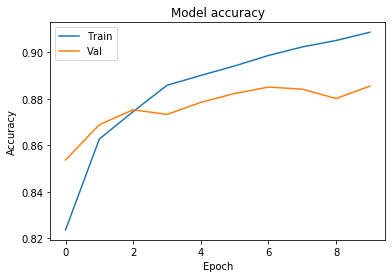

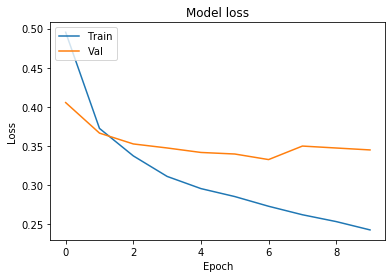

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Plot Confusion matrix 

In [56]:
!pip install mlxtend

In [68]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2425321f2b0>)

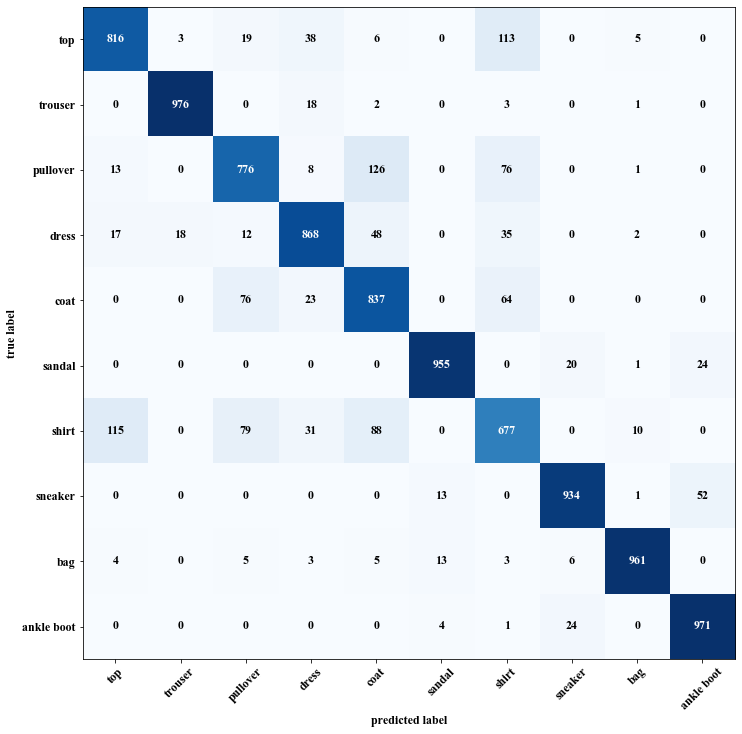

In [71]:
font = {
    'family': 'Times New Roman',
    'size': 12
}
matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), class_names = class_names, show_normed=False)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x24252fb5080>)

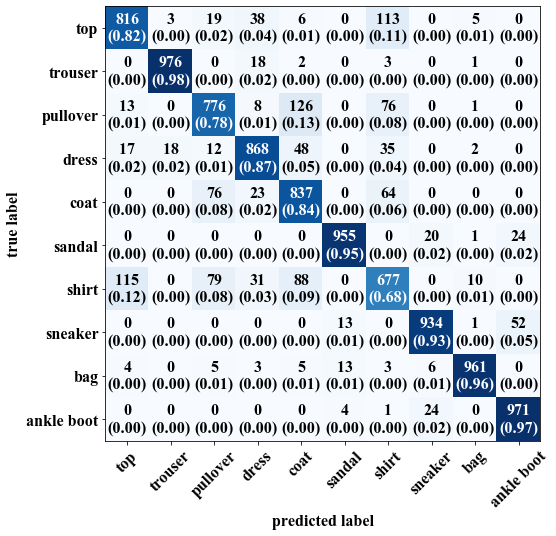

In [70]:
# font = {
#     'family': 'Times New Roman',
#     'size': 16
# }
# matplotlib.rc('font', **font)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(8, 8), class_names = class_names, show_normed=True)